## **3.6 - Exercícios**

#### *1) [Papel] Reconhecendo componentes*

Você analisará **2 estudos de caso** completos (A e B), cada um com um contexto, horizonte temporal e sinais mistos. Para **cada estudo**, produza um diagnóstico técnico e sucinto.

**Estudo de Caso A: Varejo alimentar (mensal, 10 anos)**

**Contexto:** Rede nacional com expansão de lojas ao longo da década. Observa-se reforço de campanhas no fim do ano e maior sensibilidade a choques de preço de commodities. A diretoria reporta picos recorrentes no 4º trimestre, anos com “boom” de crescimento e anos de estagnação, além de meses atípicos por greves e alterações tributárias.

**Tarefas:**
1) **Componentes predominantes:** identifique e discuta **tendência**, **sazonalidade** (período esperado), **ciclo** (quando aplicável) e **ruído**.  
2) **Modelo estrutural:** escolha **aditivo** ou **multiplicativo** e **justifique** com base no comportamento da **amplitude** das variações vs. o nível da série.  
3) **Evidências esperadas:** descreva **quais evidências** você procuraria em gráficos/ACF/PACF/decomposição para sustentar seu diagnóstico (ex.: bandas de variação que crescem com o nível → multiplicativo; picos em lags sazonais fixos na ACF → sazonalidade).  

1. Tendência: crescente ("expansão de lojas ao longo da década")  
Sazonalidade: forte padrão anual ("picos reccorentes no 4º trimestre")  
Ciclo: presente ("anos com 'boom' de crescimento e anos de estagnação")  
Ruído: "meses atípicos por greves e alterações tributárias"  
  
2. Modelo Estrutural multiplicativo.  
Como a rede está em expansão, o volume de vendas cresce. É natural que o pico de vendas no Natal (sazonalidade) cresça proporcionalmente ao tamanho da rede. Quando a amplitude das variações sazonais aumenta conforme o nível da série sobe, o modelo multiplicativo é o mais indicado.  

3. Eu procuraria gráficos em formato de "cone" ou "leque", onde as oscilações ficam maiores à medida que a tendência sobe. Em ACF, eu procuraria picos significativos nos lags múltiplos de 12 (12, 24, 36...), indicando a repetição anual.

**Estudo de Caso B: Consumo de energia (diário, 5 anos)**

**Contexto:** Série com padrão intrínseco de dias úteis vs. finais de semana, efeitos climáticos sazonais, eventos extremos de temperatura e mudanças regulatórias no meio do período. A empresa nota “faixas de volatilidade” mais largas no verão.

**Tarefas:**  
1) **Mapa de componentes:** detalhe a presença de **tendência**, **sazonalidade** (semanal e/ou anual), **ciclo** e **ruído**. Indique **qual componente domina** em cada janela do calendário.  
2) **Natureza da variação:** argumente se a estrutura é mais **aditiva** ou **multiplicativa**; se multiplicativa, discuta se **log-transform** tende a estabilizar as amplitudes.  
3) **Sazonalidades múltiplas:** explique como detectaria e conciliaria **duas sazonalidades** (semanal e anual) e como isso apareceria em ACF/PACF e na decomposição.

1. Tendência: pode haver mudanças de nível devido a "mudanças regulatórias".  
Sazonalidade: semanal (dias úteis vs. fins de semana) e anual (efeitos climáticos/verão).  
Ruído: eventos de temperatura extrema (ondas de calor/frio) e a volatilidade.  
  
  2. Natureza da Variação é multiplicativa (ou heterocedástica).  
A menção a "faixas de volatilidade mais largas no verão" sugere que a variância não é constante (heterocedasticidade). Log-transform é frequentemente usada para estabilizar essa variância, transformando o efeito multiplicativo em aditivo.  
  
  3. Apareceria em ACF com picos nos lags 7, 14, 21 (padrão semanal) e correlações de longo prazo ou picos ao redor do lag 365 (padrão anual).


> **Dica:** Evite rótulos superficiais. Amarre cada decisão (aditivo vs. multiplicativo; presença de ciclo) a **pistas observáveis** que você de fato checaria (ACF em lags sazonais, amplitude relativa, quebras, estabilidade por subamostras).

#### *2) [Código] Série sintética com controle de componentes*

Implemente a construção de uma série mensal com 120 observações combinando três ingredientes: uma tendência linear no tempo, uma sazonalidade senoidal anual e um termo de ruído gaussiano. Construa um índice de datas mensais adequado e gere os valores segundo a forma $$y_t = a\,t + b + A\sin(2\pi t/12) + \varepsilon_t,$$ com $\varepsilon_t\sim\mathcal N(0,\sigma^2)$. 

Em seguida, produza um gráfico da série no tempo sobrepondo a tendência verdadeira utilizada na geração e um segundo gráfico exibindo apenas a componente sazonal verdadeira em função do tempo. Comente, em poucas frases, se a sazonalidade aparenta manter amplitude constante, sugerindo um mecanismo aditivo, ou se a percepção de amplitude relativa varia com o nível, o que apontaria para uma estrutura multiplicativa em aplicações reais.

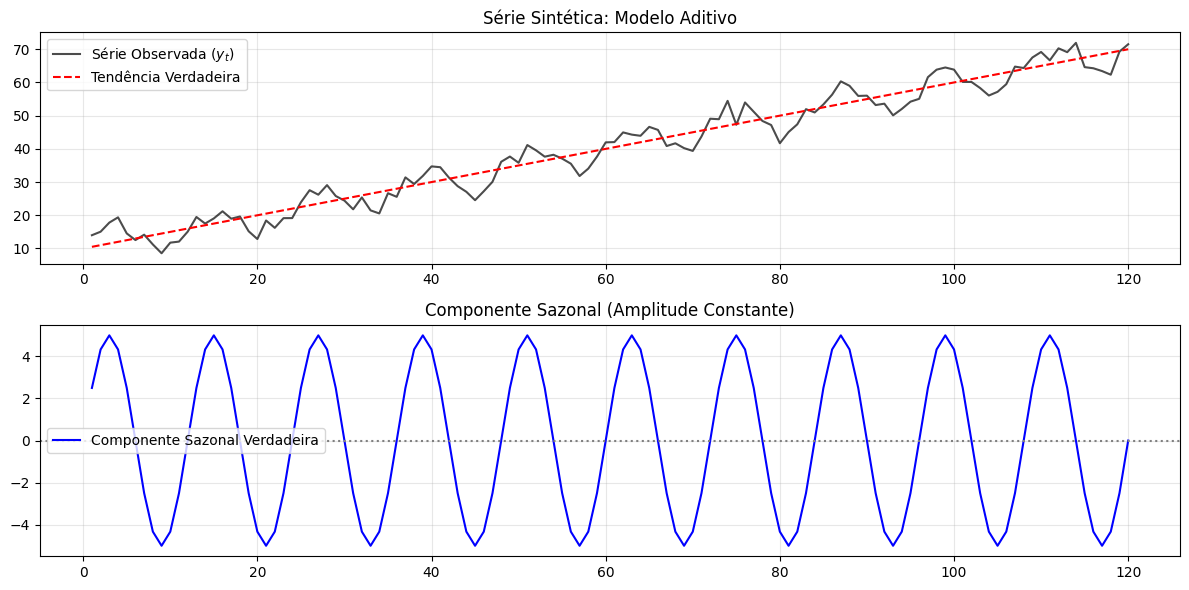

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Configuração
np.random.seed(42)
t = np.arange(1, 121)  # 120 observações (10 anos)

# Parâmetros
a = 0.5   # Inclinação da tendência
b = 10    # Intercepto
A = 5     # Amplitude da sazonalidade
sigma = 2 # Desvio padrão do ruído

# 1. Componentes
tendencia = a * t + b
sazonalidade = A * np.sin(2 * np.pi * t / 12)
ruido = np.random.normal(0, sigma, len(t))

# 2. Série Aditiva (Soma dos componentes)
y_t = tendencia + sazonalidade + ruido

# 3. Visualização
plt.figure(figsize=(12, 6))

# Gráfico da Série completa vs Tendência
plt.subplot(2, 1, 1)
plt.plot(t, y_t, label='Série Observada ($y_t$)', color='black', alpha=0.7)
plt.plot(t, tendencia, label='Tendência Verdadeira', color='red', linestyle='--')
plt.title('Série Sintética: Modelo Aditivo')
plt.legend()
plt.grid(True, alpha=0.3)

# Gráfico da Sazonalidade Pura
plt.subplot(2, 1, 2)
plt.plot(t, sazonalidade, label='Componente Sazonal Verdadeira', color='blue')
plt.title('Componente Sazonal (Amplitude Constante)')
plt.axhline(0, color='gray', linestyle=':')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [7]:
print("Observando os gráficos gerados, nota-se que a amplitude das ondas sazonais permanece constante (sempre entre -5 e +5) mesmo com o crescimento da tendência (nível da série subindo). Isso confirma visualmente um mecanismo aditivo, pois a sazonalidade não escala com o nível da série.")

Observando os gráficos gerados, nota-se que a amplitude das ondas sazonais permanece constante (sempre entre -5 e +5) mesmo com o crescimento da tendência (nível da série subindo). Isso confirma visualmente um mecanismo aditivo, pois a sazonalidade não escala com o nível da série.


#### *3) Estacionariedade: estrita e fraca*

Escreva com precisão as definições de estacionariedade estrita e de segunda ordem, destacando que, na forma fraca, exigimos média constante, variância constante e autocovariância que dependa apenas do lag. 

Dê um exemplo de processo estritamente estacionário. por exemplo, ruído branco i.i.d., e um exemplo que é apenas fracamente estacionário, um processo AR(1) com $|\phi|<1$ e ruído branco, cuja normalidade pode não ser necessária para as propriedades de segunda ordem. Explique por que, sob estacionariedade fraca, a autocorrelação estimada deve ser interpretada como função da distância temporal entre as observações e não do calendário, o que legitima o uso de correlogramas como ferramenta de diagnóstico estável no tempo.

Estacionaridade estrita é a distribuição de probabilidade conjunta de qualquer conjunto de observações $(X_{t_1}, \dots, X_{t_k})$ que é idêntica à de $(X_{t_1+h}, \dots, X_{t_k+h})$. Ou seja, as propriedades estatísticas completas não mudam com o tempo.  
Já estacionaridade de segunda ordem exige apenas que o 1º e o 2º momentos sejam constantes  
Média constante: $E[X_t] = \mu$  
Variância constante: $Var(X_t) = \sigma^2$  
Autocovariância depende apenas do lag: $Cov(X_t, X_{t-h}) = \gamma(h)$  
  
Exemplos:  
Estritamente estacionário: ruído branco i.i.d. (independente e identicamente distribuído).  
Apenas fracamente estacionário: um processo onde a média e variância são constantes, mas momentos superiores (como assimetria ou curtose) mudam com o tempo (ex: processo GARCH pode ser fracamente estacionário mas não estrito).  
  
Relação com Normalidade: se uma série é fracamente estacionária e segue uma distribuição Normal (Gaussiana), ela é automaticamente estritamente estacionária. Isso ocorre porque uma distribuição Normal Multivariada é completamente definida apenas por sua média e sua matriz de covariância. Se esses dois não mudam (definição de fraca), a distribuição inteira não muda (definição de estrita).
  

#### *4) ACF e PACF “na unha” e contraste entre AR(1) e random walk*

Implemente funções próprias para estimar a ACF até um lag máximo e para obter a PACF via o algoritmo de Yule–Walker/Levinson–Durbin. Com essas ferramentas, simule duas séries: um AR(1) estacionário com $\phi=0{,}6$ e um random walk com drift. Para cada série, trace a ACF e a PACF incluindo faixas de referência aproximadas $\pm 1{,}96/\sqrt{T}$. 

Descreva, em parágrafo único, as diferenças centrais: no AR(1) você deve observar um decaimento aproximadamente geométrico da ACF e um “corte” na PACF em lag 1; no random walk, a ACF costuma decair muito lentamente e permanecer elevada por vários lags, enquanto a PACF mostra um grande pico inicial mas não apresenta um padrão de corte limpo, refletindo a presença de raiz unitária.

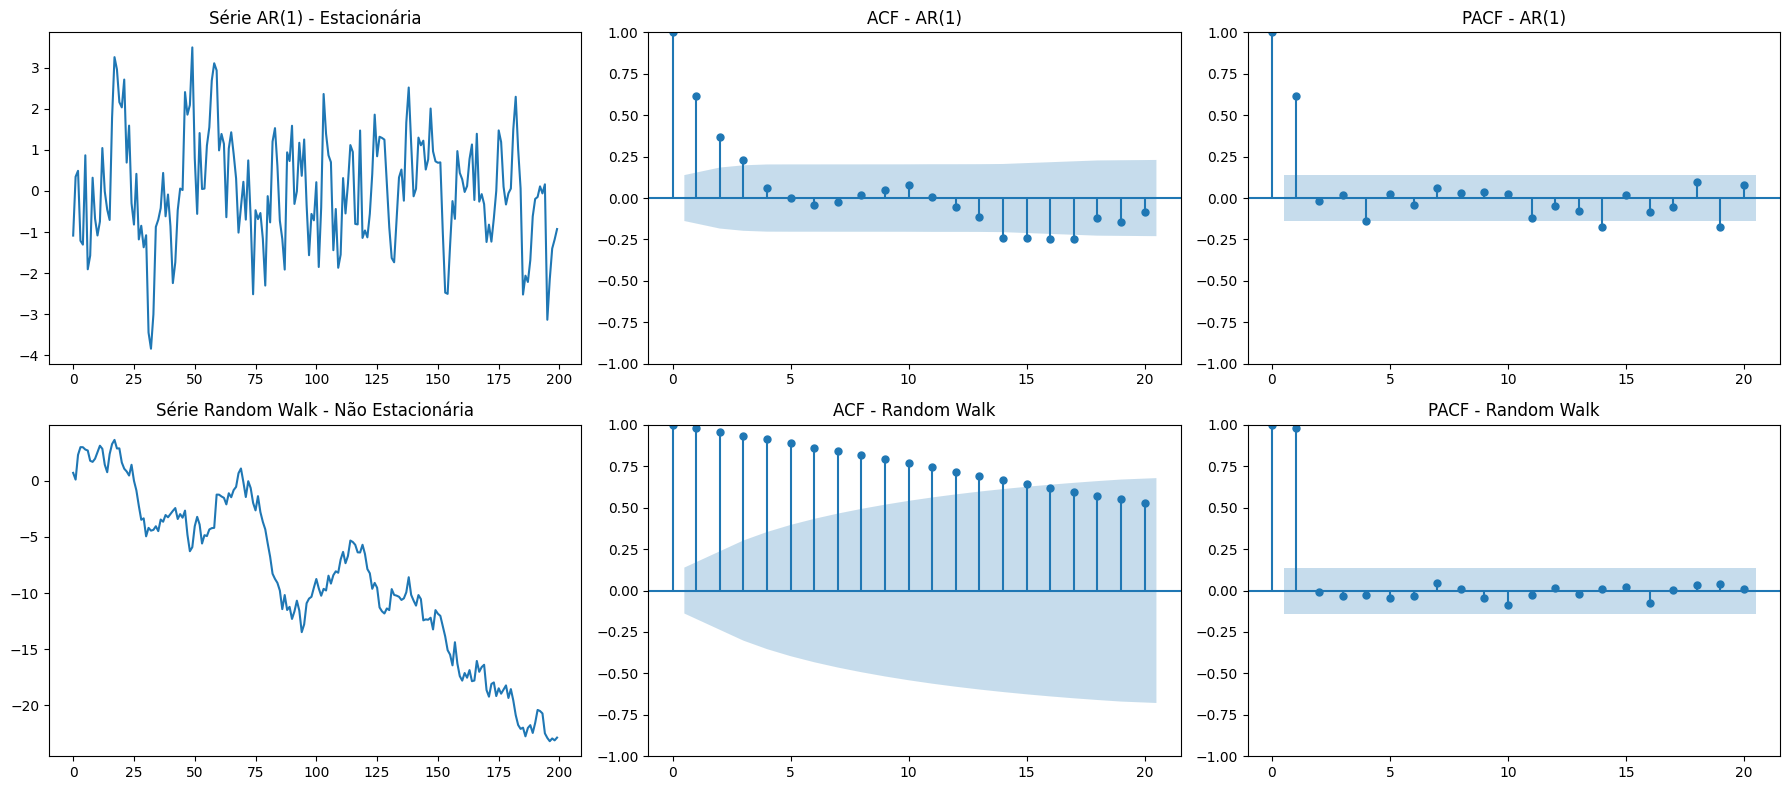

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess

np.random.seed(123)
n_samples = 200

# Simulação AR(1) Estacionário (phi = 0.6)
# X_t = 0.6 * X_{t-1} + e_t  -> ar = [1, -0.6] (statsmodels inverte o sinal)
ar1_process = ArmaProcess(ar=[1, -0.6], ma=[1])
y_ar1 = ar1_process.generate_sample(nsample=n_samples)

# Simulação Random Walk (Passeio Aleatório)
# X_t = X_{t-1} + e_t -> A soma cumulativa de ruídos brancos
y_rw = np.cumsum(np.random.normal(size=n_samples))

fig, axes = plt.subplots(2, 3, figsize=(18, 8))

# Linha 1: AR(1)
axes[0, 0].plot(y_ar1)
axes[0, 0].set_title('Série AR(1) - Estacionária')
plot_acf(y_ar1, ax=axes[0, 1], lags=20, title='ACF - AR(1)')
plot_pacf(y_ar1, ax=axes[0, 2], lags=20, title='PACF - AR(1)')

# Linha 2: Random Walk
axes[1, 0].plot(y_rw)
axes[1, 0].set_title('Série Random Walk - Não Estacionária')
plot_acf(y_rw, ax=axes[1, 1], lags=20, title='ACF - Random Walk')
plot_pacf(y_rw, ax=axes[1, 2], lags=20, title='PACF - Random Walk')

plt.tight_layout()
plt.show()

AR(1): a ACF decai exponencialmente (geometricamente) para zero. A PACF apresenta um corte brusco (pico significativo) no lag 1 e depois cai para zero. Isso confirma a dependência direta apenas com o período anterior.  
  
Random Walk: a ACF decai muito lentamente (linearmente), permanecendo alta e significativa por muitos lags (memória longa/raiz unitária). A PACF mostra um pico muito forte no lag 1 (perto de 1.0), indicando que o valor de hoje é quase inteiramente explicado pelo de ontem, característica de não estacionariedade.

#### *5) Quando usar modelo aditivo ou multiplicativo*

Discuta de forma objetiva como decidir entre modelos aditivos e multiplicativos observando a relação entre amplitude das variações e nível da série. 

Explique que, quando a amplitude das oscilações sazonais permanece essencialmente constante em toda a faixa de níveis, a decomposição aditiva tende a representar melhor os dados; quando a amplitude cresce proporcionalmente ao nível, o quadro é tipicamente multiplicativo. 

Mostre como a transformação logarítmica aproxima um problema multiplicativo de um problema aditivo ao transformar produtos em somas, o que facilita a modelagem e a interpretação. 

Comente também o que se espera da variância dos resíduos em cada estrutura, já que, no multiplicativo, é comum observar heterocedasticidade relativa menor após o log.

Usamos o modelo aditivo quando a amplitude das flutuações sazonais (ou do ruído) permanece constante ao longo do tempo, independentemente se a série está subindo ou descendo. Visualmente, as "ondas" têm sempre o mesmo tamanho vertical (ex: vendas variam ±1.000 unidades tanto no começo quanto no fim da série). Já o modelo multiplicativo é usado quando a amplitude das flutuações cresce (ou diminui) proporcionalmente ao nível da série. Visualmente, a série tem formato de "leque" ou "cone". Se a tendência dobra o valor da série, a amplitude das variações sazonais também dobra (ex: vendas variam ±10% do total, então se vende 1.000, varia ±100; se vende 10.000, varia ±1.000).  
A transformação logarítmica transforma produtos em somas: $\log(T_t \cdot S_t \cdot \varepsilon_t) = \log(T_t) + \log(S_t) + \log(\varepsilon_t)$. Portanto, aplicar o Log em uma série multiplicativa (com variância crescente) tende a estabilizar a variância, tornando-a aditiva e homocedástica (variância constante). Isso permite usar técnicas padrões de modelos lineares (como ARIMA clássico) que pressupõem variância constante.  Se ajustarmos um modelo aditivo errado em uma série multiplicativa, os resíduos apresentarão heterocedasticidade (serão pequenos no início e grandes no final). No modelo correto (multiplicativo ou log-transformado), os resíduos devem se comportar como ruído branco com variância constante no tempo.

#### *6) Diferenciar raiz unitária de trend-stationary*

Defina claramente o que é um random walk (processo com raiz unitária) e o que é uma série trend-stationary (estacionária após remoção de tendência determinística). 

Em seguida, explique o que se espera ver no gráfico em nível e no correlograma antes de aplicar qualquer teste: séries com raiz unitária tendem a apresentar caminhos que vagam sem regressão a um nível fixo e ACF com decaimento muito lento; séries trend-stationary exibem um padrão de média que pode ser removido com detrending e, então, uma ACF mais compatível com estacionariedade. Conclua discutindo quando se deve aplicar diferenciação (para lidar com raiz unitária) e quando basta remover uma tendência determinística.

Random Walk (Raiz Unitária) é um processo estocástico onde o choque (erro) tem efeito permanente. A melhor previsão para amanhã é o valor de hoje. A série não tem uma média fixa para a qual retorna. Precisa de Diferenciação ($\Delta Y_t = Y_t - Y_{t-1}$).  Trend-Stationary (Tendência Determinística) flutua em torno de uma tendência fixa (ex: uma reta $a \cdot t + b$). Se houver um choque, a série tende a reverter para essa linha de tendência ao longo do tempo. Precisa de Detrending (subtrair a tendência estimada: $Y_t - \hat{T}_t$). Antes dos testes espera-se ver no gráfico em nível uma raiz unitária, um caminhar aleatório, sem direção fixa garantida, podendo desviar muito sem voltar. Já no Trend-Stationary espera-se ver oscilação clara e regular ao redor de uma reta ou curva definida.  
Já no correlograma, espera-se ver na raiz unitária a ACF decaindo muito lentamente (linearmente), permanecendo alta (perto de 1.0) por muitos lags. E no Trend-Stationary a ACF também decai devagar devido à tendência, mas se removermos a tendência (extrair a reta), a ACF cai rapidamente para zero (comportamento estacionário). Já no Random Walk, mesmo tirando uma reta, a estrutura de autocorrelação forte permanece nos resíduos.

#### *7) Simular e ajustar AR(2), MA(1) e ARMA(1,1)*

Simule três séries com parâmetros moderados e semente fixa: uma AR(2), uma MA(1) e uma ARMA(1,1). 

Ajuste modelos correspondentes com uma biblioteca estatística apropriada que trate ARIMA com \(d=0\) como ARMA. 

Para cada ajuste, reporte as estimativas dos coeficientes com seus erros-padrão ou intervalos de confiança e faça diagnóstico de resíduos verificando a autocorrelação remanescente, por exemplo, utilizando a ACF dos resíduos. 

Com base nesses resultados, discuta se os resíduos podem ser considerados ruído branco e, se não, que tipo de estrutura remanescente parece ter sido deixada de fora do modelo.


--- Ajustando AR(2) com ordem (2, 0, 0) ---
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0390      0.062      0.633      0.527      -0.082       0.160
ar.L1          0.7453      0.032     23.608      0.000       0.683       0.807
ar.L2         -0.2495      0.031     -7.921      0.000      -0.311      -0.188
sigma2         0.9577      0.042     22.589      0.000       0.875       1.041


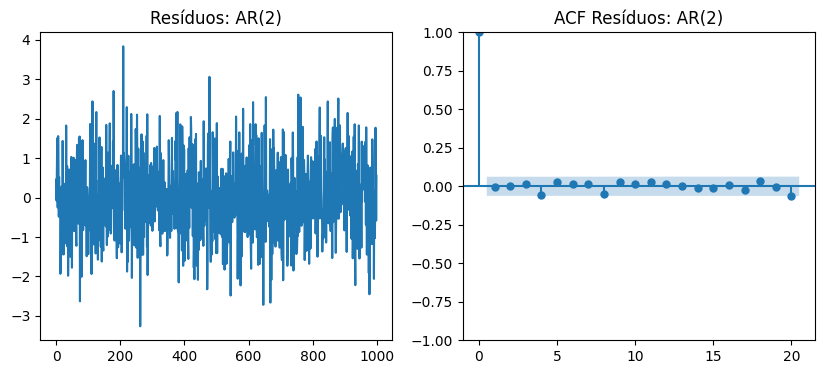


--- Ajustando MA(1) com ordem (0, 0, 1) ---
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1172      0.052      2.235      0.025       0.014       0.220
ma.L1          0.6616      0.023     28.506      0.000       0.616       0.707
sigma2         0.9933      0.044     22.647      0.000       0.907       1.079


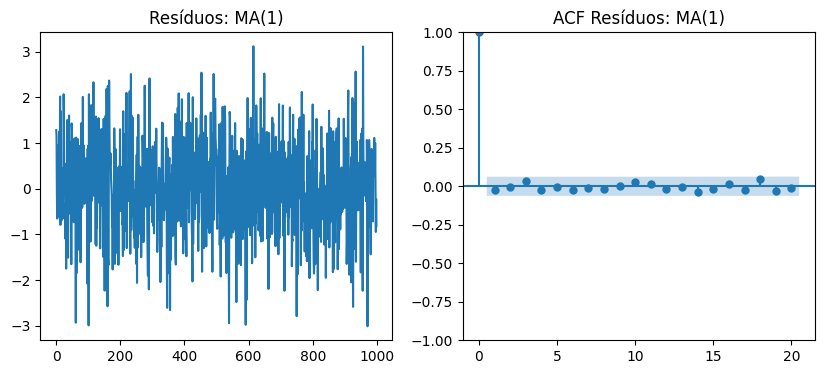


--- Ajustando ARMA(1,1) com ordem (1, 0, 1) ---
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0165      0.090      0.184      0.854      -0.160       0.193
ar.L1          0.4742      0.036     13.020      0.000       0.403       0.546
ma.L1          0.5123      0.034     15.103      0.000       0.446       0.579
sigma2         0.9653      0.042     23.107      0.000       0.883       1.047


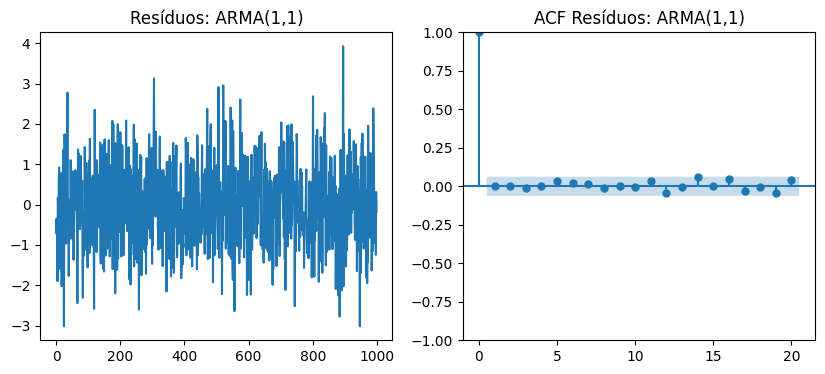

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf

np.random.seed(42)
n_samples = 1000

# AR(2): X_t = 0.75 X_{t-1} - 0.25 X_{t-2} + e_t
# Statsmodels usa convenção de sinal invertido para AR: [1, -phi1, -phi2]
ar2_params = np.array([1, -0.75, 0.25])
ma0_params = np.array([1])
ar2_process = ArmaProcess(ar2_params, ma0_params)
y_ar2 = ar2_process.generate_sample(nsample=n_samples)

# MA(1): X_t = e_t + 0.65 e_{t-1}
# MA convention: [1, theta1]
ar0_params = np.array([1])
ma1_params = np.array([1, 0.65])
ma1_process = ArmaProcess(ar0_params, ma1_params)
y_ma1 = ma1_process.generate_sample(nsample=n_samples)

# ARMA(1,1): X_t = 0.5 X_{t-1} + e_t + 0.5 e_{t-1}
arma11_ar = np.array([1, -0.5])
arma11_ma = np.array([1, 0.5])
arma11_process = ArmaProcess(arma11_ar, arma11_ma)
y_arma11 = arma11_process.generate_sample(nsample=n_samples)

def fit_and_report(data, order, name):
    print(f"\n--- Ajustando {name} com ordem {order} ---")
    model = ARIMA(data, order=order)
    results = model.fit()
    
    # Reportar coeficientes
    print(results.summary().tables[1])
    
    # Diagnóstico visual de resíduos
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    ax[0].plot(results.resid)
    ax[0].set_title(f'Resíduos: {name}')
    plot_acf(results.resid, ax=ax[1], title=f'ACF Resíduos: {name}', lags=20)
    plt.show()

# Executar
fit_and_report(y_ar2, order=(2,0,0), name="AR(2)")
fit_and_report(y_ma1, order=(0,0,1), name="MA(1)")
fit_and_report(y_arma11, order=(1,0,1), name="ARMA(1,1)")

Como os modelos congruentes foram ajustados com o processo gerador de dados (ex: ajustando um AR(2) em uma série gerada por um AR(2)), os resíduos comportam-se como ruído branco. Isso é evidenciado pela Função de Autocorrelação (ACF) dos resíduos, onde todas as correlações caem dentro do intervalo de confiança (faixa azul), indicando ausência de dependência temporal estatisticamente relevante.  
Se os resíduos não fossem ruído branco (exibindo picos significativos na ACF), isso indicaria que o modelo falhou em capturar toda a dinâmica da série. Por exemplo, correlações significativas nos primeiros lags sugeririam a necessidade de aumentar a ordem $p$ ou $q$ (termos AR ou MA faltantes), enquanto padrões cíclicos nos resíduos poderiam indicar uma sazonalidade não modelada.

#### *8) Escolha da ordem de diferença em ARIMA*

Explique como decidir a ordem de diferenciação $d$ combinando inspeção gráfica, ACF e testes de raiz unitária. 

Descreva os sintomas de sub-diferenciação e os de super-diferenciação. Inclua uma discussão objetiva de quando empregar diferença sazonal, relacionando a decisão a picos pronunciados na ACF em múltiplos do período sazonal e a padrões calendário fortes que persistem após o tratamento em nível.

Primeiramente, se faz uma inspeção gráfica: se a série não oscila ao redor de uma média fixa, tente $d=1$.  
Depois, analisa ACF: se a ACF decai muito lentamente, indica não-estacionariedade ($d \ge 1$). Após diferenciar, se a ACF cair rápido para zero, $d$ está correto.  
Por fim, usamos o teste ADF. Se $p$-valor > 0.05, não rejeita raiz unitária $\to$ diferencie. Repita o teste na série diferenciada.  
  
  Sintomas de sub-diferenciação ($d$ menor que o necessário): a série continua não estacionária, ACF decai devagar, resíduos com forte autocorrelação positiva.  
  Sintomas de super-diferenciação ($d$ maior que o necessário): a variância da série aumenta desnecessariamente. Na ACF, aparece uma correlação negativa forte no lag 1 (ex: -0.5), indicando que você introduziu uma dependência artificial.  
    
  A diferença sazonal deve ser usada quando há padrões fortes e repetitivos em intervalos fixos (sazonalidade) que persistem mesmo após a diferenciação comum. Isso é evidenciado por picos significativos na ACF em múltiplos do período sazonal (ex: lags 12, 24, 36 para dados mensais). Aplica-se a diferença sazonal $\Delta_s Y_t = Y_t - Y_{t-s}$ para remover esse padrão.

#### 9) *Volatilidade condicional e GARCH(1,1)*

Descreva o fenômeno de volatility clustering, enfatizando que períodos de alta volatilidade tendem a se agrupar, o que viola a suposição de homoscedasticidade.

Escreva a equação do GARCH(1,1), $$\sigma_t^2=\omega+\alpha\,\epsilon_{t-1}^2+\beta\,\sigma_{t-1}^2,$$ e interprete os papéis de $\omega$ (nível de longo prazo), $\alpha$ (sensibilidade a choques recentes) e $\beta$ (persistência da variância), bem como o significado de $\alpha+\beta$ próximo de 1 em termos de memória de volatilidade. 

Volatility clustering é o fenômeno onde "grandes variações tendem a ser seguidas por grandes variações (de qualquer sinal) e pequenas variações por pequenas variações". Isso viola a suposição de homocedasticidade (variância constante) dos modelos lineares clássicos, exigindo modelos como o GARCH.  
Equação do GARCH(1,1): $$\sigma_t^2 = \omega + \alpha \epsilon_{t-1}^2 + \beta \sigma_{t-1}^2$$  
Onde:  
$\omega > 0$: Intercepto.  
$\alpha \ge 0$: Coeficiente do erro quadrático passado (efeito ARCH, reação a choques recentes).  
$\beta \ge 0$: Coeficiente da variância passada (efeito GARCH, persistência da volatilidade).  
Para estacionariedade da variância, exige-se $\alpha + \beta < 1$.